# PCA, ICA, and UMAP

In [47]:
# list of packages
x <- c('dplyr',
        'data.table',
        'tidyr',  
        'tibble',
        'jsonlite', 
        'rjson',
        'httr', 
        'tidyverse', 
        'ggplot2', 
        'viridis', 
        'umap', 
        'FactoMineR', 
        'fastICA')

In [48]:
# install packages if necessary
for (pkg in x) {
    if (!pkg %in% rownames(installed.packages())) {install.packages(pkg)}
}

In [49]:
# load packages
load_lib <- function(x) {
    suppressPackageStartupMessages(library(x, character.only = TRUE))
}
invisible(lapply(x, load_lib))

## Data

In [17]:
# Enter the file name of the .json file in your root directory below
lt  <-  fromJSON(file = "../requested_data---19-10-2021---20_44_20.json")

In [ ]:
# Create a dataframe from the data
df  <- do.call(rbind, lapply(lt, rbind))
df  <- as.data.frame(df)
df$gene  <- as.character(df$gene)
df$model  <- as.character(df$model)
df$log.tpm  <- as.numeric(df$log.tpm)
df$tumor_type <- as.character(df$tumor_type)
head(df, 2)
print(dim(df))

In [ ]:
# Pivot the data
log_tpm <- df %>% 
    select(c('gene', 'model', 'log.tpm'))  %>% 
    pivot_wider(names_from = gene, values_from = log.tpm)  %>% 
    column_to_rownames('model')
log_tpm  <- log_tpm[complete.cases(log_tpm),]  # remove rows with missing values
log_tpm[1:2, 1:10]
print(dim(log_tpm))

## PCA

In [41]:
pca_out <- PCA(log_tpm)

In [42]:
# join the output with the original dataframe to have tumor_type
pca_plot <- data.frame(PC1 = pca_out$ind$coord[,1], 
                       PC2 = pca_out$ind$coord[,2], 
                       model = rownames(pca_out$ind$coord)) %>% 
    inner_join(df, by="model")

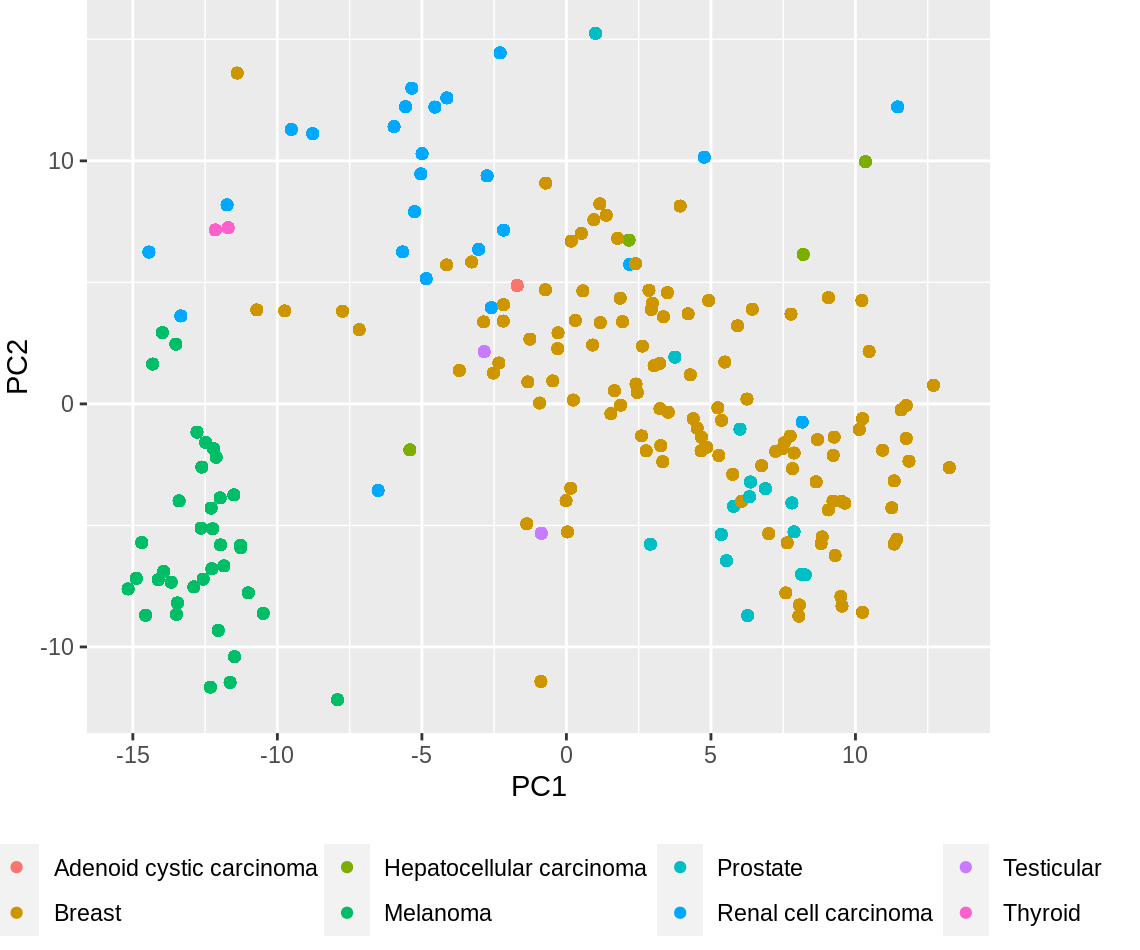

In [51]:
# plot
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res=190)  # set figure size
ggplot(pca_plot, aes(x = PC1, y = PC2)) + 
    geom_point(aes(color = tumor_type)) +
    theme(legend.position = "bottom",
          legend.title = element_blank(),
          plot.margin = unit(c(0,2,0,0.1), "cm"))

## ICA

In [20]:
ica_out <- fastICA(log_tpm, 2)

In [28]:
# join the output with the original dataframe to have tumor_type
ica_plot <- data.frame(IC1 = ica_out$S[,1], 
                       IC2 = ica_out$S[,2], 
                        model = rownames(ica_out$S)) %>% 
    inner_join(df, by="model")

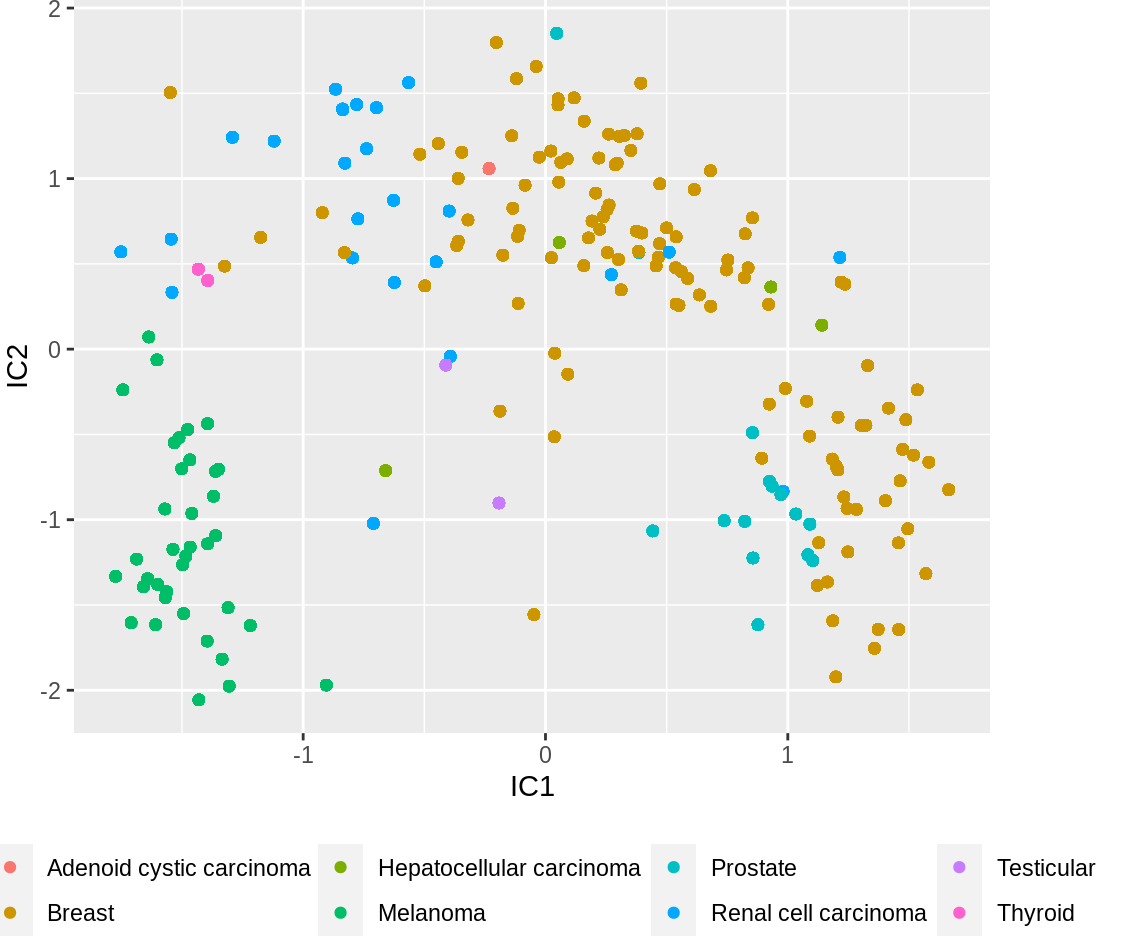

In [52]:
# plot
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res=190)  # set figure size
ggplot(ica_plot, aes(x = IC1, y = IC2)) + 
    geom_point(aes(color = tumor_type)) +
    theme(legend.position = "bottom",
          legend.title = element_blank(),
          plot.margin = unit(c(0,2,0,0.1), "cm"))

## UMAP

In [44]:
umap_out <- umap(log_tpm)
umap_out

umap embedding of 207 items in 2 dimensions
object components: layout, data, knn, config



In [45]:
# join the output with the original dataframe to have tumor_type
umap_plot <- data.frame(UMAP1 = umap_out$layout[,1], 
                        UMAP2 = umap_out$layout[,2], 
                        model = rownames(umap_out$layout)) %>% 
    inner_join(df, by="model")

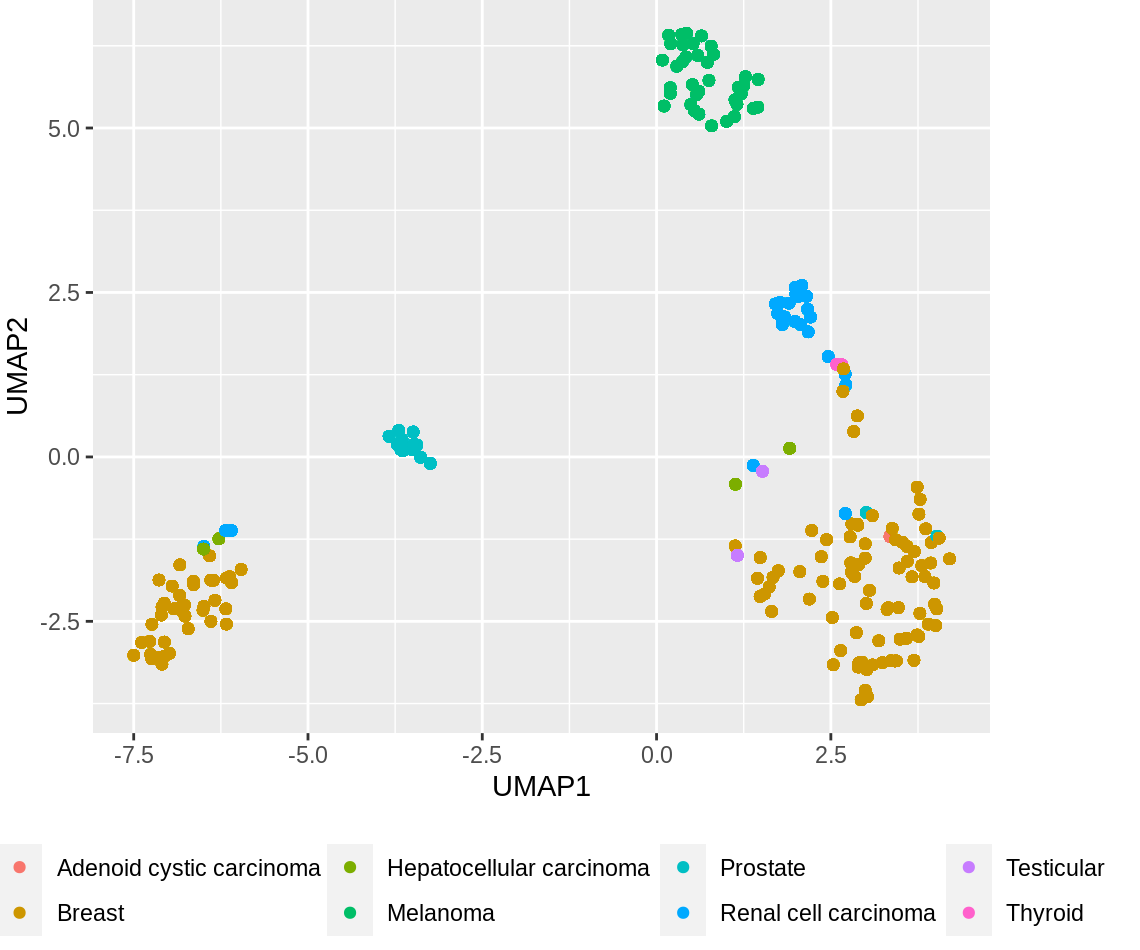

In [53]:
# plot
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res=190)  # set figure size
ggplot(umap_plot, aes(x = UMAP1, y = UMAP2)) + 
    geom_point(aes(color = tumor_type)) +
    theme(legend.position = "bottom",
          legend.title = element_blank(),
          plot.margin = unit(c(0,2,0,0.1), "cm"))

# breast cancer are in two clusters because breast cancer has distinct subtypes